In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import os
print(os.listdir())
os.chdir('/Users/user/Documents/projects/Airline Delays')
print(os.getcwd())

['online_retail', 'Untitled1.ipynb', 'sales-analytics', '.DS_Store', 'anaconda_projects', 'Untitled.ipynb', 'Airline Delays', 'data_profiling', 'IBM HR Analytics Employee Attrition & Performance.csv', 'FINAL PROJECT SQL COURSE', 'amazon-reviews-analysis', 'Diabetes', 'TLS', '.virtual_documents', 'GOALLLL.png', '.ipynb_checkpoints', 'data', 'RetailRocket Funnel Analysis', 'SQL']
/Users/user/Documents/projects/Airline Delays


In [12]:
fd = pd.read_csv('cleaned_dataset.csv')
fd.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,delay_rate,arr_cancelled,...,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,0.288889,4.0,...,8.63,3.24,4.41,0.0,9.72,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.200000,0.0,...,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,0.333333,2.0,...,7.21,1.82,8.65,0.0,5.32,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,0.277419,9.0,...,12.78,2.69,10.34,0.0,17.19,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,0.337209,4.0,...,9.32,0.00,4.07,0.0,15.61,638.0,0.0,194.0,0.0,1102.0


In [13]:
carrier_delays = fd.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False).head(10)

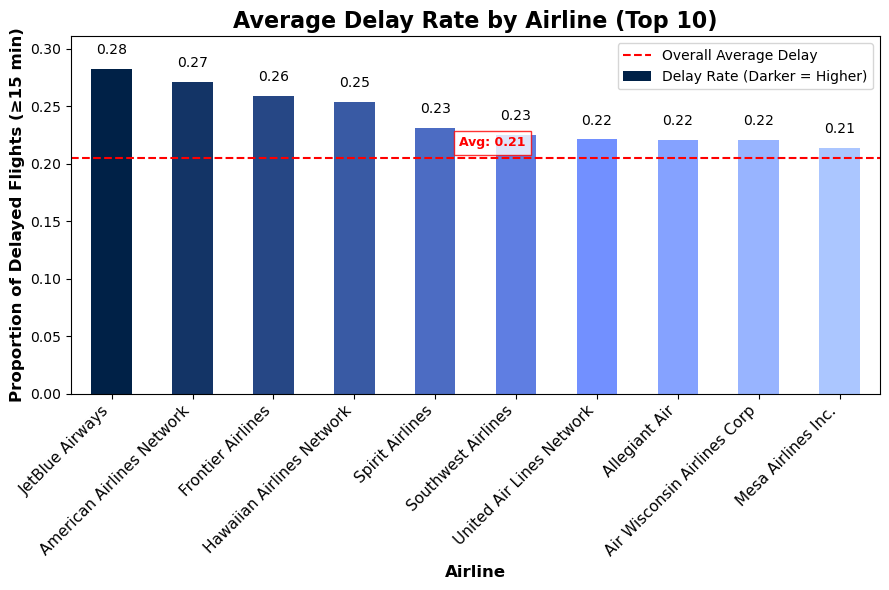

In [14]:
# Select top 10 carriers by delay rate for visualization
top_carriers = carrier_delays.head(10)
# Create a bar chart
plt.figure(figsize=(9, 6))
colors = [
    '#002147', 
    '#133466',
    '#264785',
    '#395AA4',
    '#4C6CC3',
    '#5F7EE2',
    '#7290FF',
    '#85A2FF',
    '#98B4FF',
    '#ABC6FF'  
]
top_carriers.plot(kind='bar', color= colors, label='Delay Rate (Darker = Higher)')
plt.title('Average Delay Rate by Airline (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Airline', fontsize=12, fontweight='bold')
plt.ylabel('Proportion of Delayed Flights (≥15 min)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
# Add overall average delay line
overall_avg_delay = fd['delay_rate'].mean()
plt.axhline(y=overall_avg_delay, color='red', linestyle='--', label='Overall Average Delay')
# Add text annotation for the average delay
plt.text(x=4.3, y=overall_avg_delay + 0.01, s=f'Avg: {overall_avg_delay:.2f}', 
         color='red', fontsize=9, fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))
# Add delay rate values above each bar
for i, value in enumerate(top_carriers):
    plt.text(i, value + 0.013, f'{value:.2f}', ha='center', fontsize=10, color='black')
    
plt.legend()
plt.margins(x=0.3, y=0.1) 
plt.tight_layout()  
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/carrier_delays.png', dpi=300, bbox_inches='tight')
plt.show()